In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
import pandeia
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from pandeia.engine.perform_calculation import perform_calculation
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, psf

In [2]:
psf_dir = psf.get_pandeia_psf_dir()
parent_dir = os.path.dirname(psf_dir)
originals_dir = os.path.join(parent_dir, 'default_psfs')
file_list = glob(originals_dir + '/wfi_imaging-f062*')

# test providing a path
psf.reset_pandeia_psfs(originals_dir)

100%|██████████| 29/29 [00:00<00:00, 154.42it/s]


In [3]:
psf_dir = psf.get_pandeia_psf_dir()
old_psf_list = glob(psf_dir + '/wfi_imaging-f062*')
old_psf_list.sort()
# pprint(old_psf_list)

In [4]:
psf.print_header(old_psf_list[0])

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  195                                                  
NAXIS2  =                  195                                                  
PLANE1  = 'Wavefront Intensity'                                                 
WAVELEN = 4.46450819553758E-07 / Weighted mean wavelength in meters             
DIFFLMT =  0.03811229326264374 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                    5 / Oversampling factor for FFTs in computation    
DET_SAMP=                    5 / Oversampling factor for MFT to detector plane  
PIXELSCL=                0.022 / Scale in arcsec/pix (after oversampling)       
FOV     =                 4.29 / Field of view in arcsec (full array)           
NWAVES  =                   

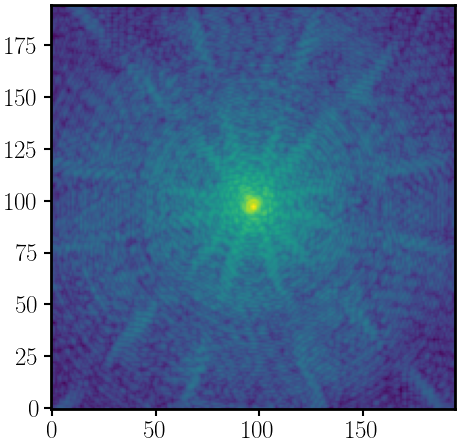

In [5]:
original_psf = psf.load_psf(old_psf_list[0])

plt.imshow(np.log10(original_psf))

In [6]:
detector = psf.get_random_detector()
detector_position = psf.get_random_position()

Detector: SCA08
Detector position: 2653, 2014


In [7]:
psf.update_pandeia_psfs(detector, detector_position)

  0%|          | 0/29 [00:00<?, ?it/s]Attempted to get aberrations at wavelength 4.5e-07 outside the range of the reference data; clipping to closest wavelength 4.8e-07
Attempted to get aberrations at wavelength 4.5e-07 outside the range of the reference data; clipping to closest wavelength 4.8e-07
Attempted to get aberrations at wavelength 4.5e-07 outside the range of the reference data; clipping to closest wavelength 4.8e-07
Attempted to get aberrations at wavelength 4.5e-07 outside the range of the reference data; clipping to closest wavelength 4.8e-07
Attempted to get aberrations at wavelength 4.5e-07 outside the range of the reference data; clipping to closest wavelength 4.8e-07
  3%|▎         | 1/29 [00:21<10:11, 21.83s/it]Attempted to get aberrations at wavelength 4.7e-07 outside the range of the reference data; clipping to closest wavelength 4.8e-07
Attempted to get aberrations at wavelength 4.7e-07 outside the range of the reference data; clipping to closest wavelength 4.8e-07

('SCA08', (2653, 2014))

In [8]:
new_psf_list = glob(psf_dir + '/wfi_imaging-f062*')
new_psf_list.sort()
# pprint(new_psf_list)

In [9]:
psf.print_header(new_psf_list[0])

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  195                                                  
NAXIS2  =                  195                                                  
EXTEND  =                    T                                                  
PLANE1  = 'Wavefront Intensity'                                                 
WAVELEN =            4.465E-07 / Weighted mean wavelength in meters             
DIFFLMT =   0.0381164916636945 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                    5 / Oversampling factor for FFTs in computation    
DET_SAMP=                    5 / Oversampling factor for MFT to detector plane  
PIXELSCL=                0.022 / Scale in arcsec/pix (after oversampling)       
FOV     =                 4.

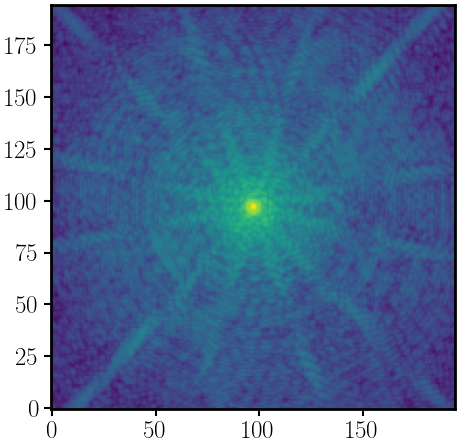

In [10]:
new_psf = psf.load_psf(new_psf_list[0])

plt.imshow(np.log10(new_psf))

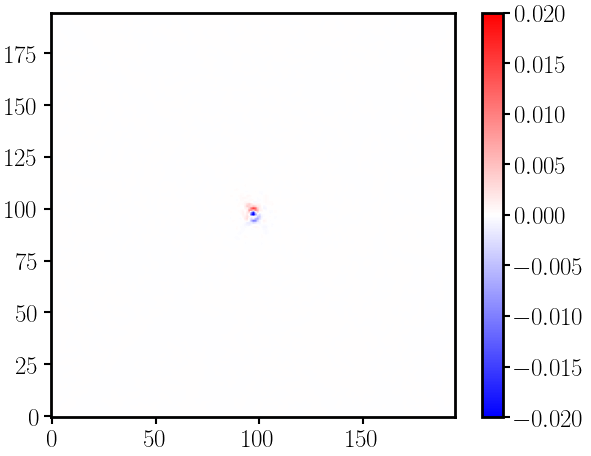

In [11]:
difference = original_psf - new_psf

plt.imshow(difference, cmap='bwr', vmin=-0.02, vmax=0.02)
plt.colorbar()

In [12]:
# test the pre-programmed default dir

psf.reset_pandeia_psfs()

100%|██████████| 29/29 [00:00<00:00, 152.61it/s]
